# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt
import lab6

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [2]:
m = 10  # rozmiar macierzy

A1, b1 = lab6.random_matrix_Ab(m)
A2, b2 = main.diag_dominant_matrix_A_b(m)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [3]:
# DANE DO KOLEJNYCH 3 ZADAŃ

x_init = np.zeros(m)
epsilon = 1e-12
maxiter = [1, 2, 4, 6, 8, 10, 12, 16, 20]
#maxiter = [1, 2, 4, 6, 8, 10]
solve_results = []
jacobi_results = []
cq_results = []
gmres_results = []

In [4]:
# Funkcja solve

print('Rozwiązanie funkcją solve')
ans = np_linalg.solve(A1, b1)
print(ans, '\n')
print('WARTOŚĆ NORMY: ', lab6.residual_norm(A1, ans, b1))

Rozwiązanie funkcją solve
[ 1.75440685 -1.59278545  0.86392166  1.13141311 -1.29540148  0.07180025
 -0.66523271  0.17961871 -0.35088849 -0.04749944] 

WARTOŚĆ NORMY:  5.93685988088609e-14


In [5]:
# Zaimplementowana funkcja solve_jacobi

if main.is_diag_dominant(A1) is None:
    print('Macierz nie spełnia warunków dot. metody solve_jacobi')

Macierz nie spełnia warunków dot. metody solve_jacobi


In [6]:
# Iteracyjna metoda gradientów sprzężonych

if main.is_symmetric(A1) is None:
    print('Macierz nie spełnia warunków dot. metody gradientów sprzężonych')

Macierz nie spełnia warunków dot. metody gradientów sprzężonych


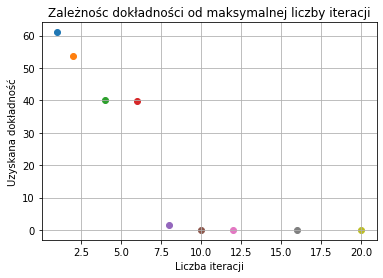

5.6 ms ± 461 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
7.4 ms ± 519 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
11.1 ms ± 1.1 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
16.2 ms ± 2.49 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
19.1 ms ± 1.89 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
340 µs ± 94.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
339 µs ± 75.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
324 µs ± 59.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
316 µs ± 43.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


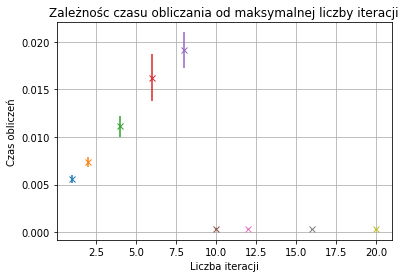

In [7]:
# Iteracyjna metoda GMRES

for i in range(len(maxiter)):
    ans_x, iters = sp_linalg.gmres(A1, b1, x_init, epsilon, maxiter[i])
    norm = lab6.residual_norm(A1, ans_x, b1)
    gmres_results.append(norm)
    
    plt.scatter(maxiter[i], gmres_results[i])
    plt.title('Zależnośc dokładności od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()

time = []
error = []
for i in range(len(maxiter)):
    method_time = %timeit -r 10 -n 10 -o sp_linalg.gmres(A1, b1, x_init, epsilon, maxiter[i])
    time.append(method_time.average)
    error.append(method_time.stdev)
    plt.errorbar(maxiter[i], time[i], yerr=error[i], marker="x")
    plt.title('Zależnośc czasu obliczania od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Czas obliczeń')
    plt.grid()
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [8]:
# Funkcja solve

print('Rozwiązanie funkcją solve')
ans = np_linalg.solve(A2, b2)
print(ans, '\n')
print('WARTOŚĆ NORMY: ', lab6.residual_norm(A2, ans, b2))

Rozwiązanie funkcją solve
[-0.00049233  0.10395167  0.12743208 -0.04027279 -0.0653428  -0.04951245
  0.10235527  0.07858117  0.14431251  0.03058715] 

WARTOŚĆ NORMY:  2.8245304391402273e-15


Macierz spełnia warunki dot. metody solve_jacobi 



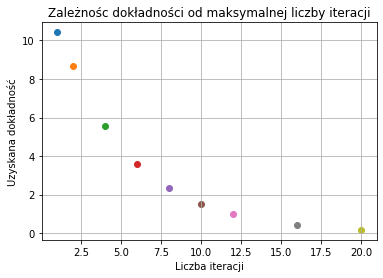

The slowest run took 4.05 times longer than the fastest. This could mean that an intermediate result is being cached.
55.9 µs ± 32.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
41.3 µs ± 8.75 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
56.7 µs ± 16.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
92.4 µs ± 28.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
107 µs ± 23.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
127 µs ± 27.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
134 µs ± 21.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
170 µs ± 34 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
204 µs ± 29.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


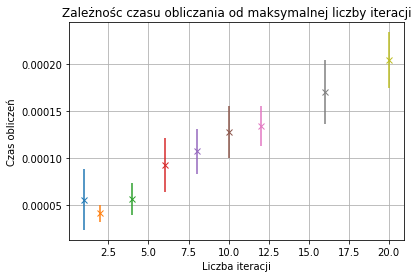

In [9]:
# Zaimplementowana funkcja solve_jacobi

if main.is_diag_dominant(A2) is True:
    print('Macierz spełnia warunki dot. metody solve_jacobi \n')

jacobi_results = []
for i in range(len(maxiter)):
    ans_x, iters = main.solve_jacobi(A2, b2, x_init, epsilon, maxiter[i])
    norm = lab6.residual_norm(A2, ans_x, b2)
    jacobi_results.append(norm)
    
    plt.scatter(maxiter[i], jacobi_results[i])
    plt.title('Zależnośc dokładności od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()

time = []
error = []
for i in range(len(maxiter)):
    method_time = %timeit -r 10 -n 10 -o main.solve_jacobi(A2, b2, x_init, epsilon, maxiter[i])
    time.append(method_time.average)
    error.append(method_time.stdev)
    plt.errorbar(maxiter[i], time[i], yerr=error[i], marker="x")
    plt.grid()
    plt.title('Zależnośc czasu obliczania od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Czas obliczeń')
plt.show()

In [10]:
# Iteracyjna metoda gradientów sprzężonych

if main.is_symmetric(A2) is None:
    print('Macierz nie spełnia warunków dot. metody gradientów sprzężonych')

Macierz nie spełnia warunków dot. metody gradientów sprzężonych


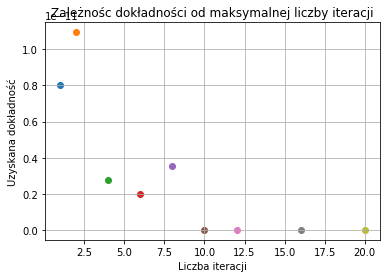

1.85 ms ± 253 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
662 µs ± 35.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
533 µs ± 31.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
478 µs ± 37.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
486 µs ± 88.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
322 µs ± 100 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
349 µs ± 77.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
337 µs ± 50.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
337 µs ± 62 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


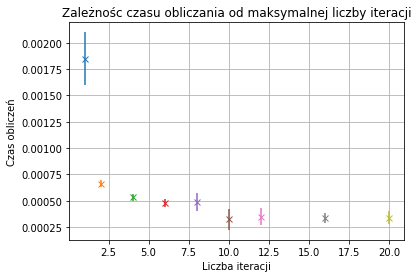

In [11]:
# Iteracyjna metoda GMRES

gmres_results = []
for i in range(len(maxiter)):
    ans_x, iters = sp_linalg.gmres(A2, b2, x_init, epsilon, maxiter[i])
    norm = lab6.residual_norm(A2, ans_x, b2)
    gmres_results.append(norm)
    
    plt.scatter(maxiter[i], gmres_results[i])
    plt.title('Zależnośc dokładności od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()

time = []
error = []
for i in range(len(maxiter)):
    method_time = %timeit -r 10 -n 10 -o sp_linalg.gmres(A2, b2, x_init, epsilon, maxiter[i])
    time.append(method_time.average)
    error.append(method_time.stdev)
    plt.errorbar(maxiter[i], time[i], yerr=error[i], marker="x")
    plt.title('Zależnośc czasu obliczania od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Czas obliczeń')
    plt.grid()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [12]:
# Funkcja solve

print('Rozwiązanie funkcją solve')
ans = np_linalg.solve(A3, b3)
print(ans, '\n')
print('WARTOŚĆ NORMY: ', lab6.residual_norm(A3, ans, b3))

Rozwiązanie funkcją solve
[ 0.86248657  0.27946383  3.53979041 -1.17054478  0.10647495 -1.6514003
 -0.40072238 -1.61140448  0.75344223  0.14855648] 

WARTOŚĆ NORMY:  1.2314970930892997e-14


In [13]:
# Zaimplementowana funkcja solve_jacobi

if main.is_diag_dominant(A1) is None:
    print('Macierz nie spełnia warunków dot. metody solve_jacobi')

Macierz nie spełnia warunków dot. metody solve_jacobi


Macierz spełnia warunki dot. metody gradientów sprzężonych 



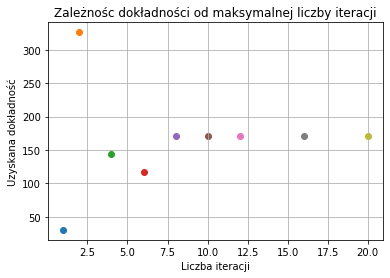

133 µs ± 31.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
184 µs ± 71.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
203 µs ± 69.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
326 µs ± 114 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
268 µs ± 32.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
300 µs ± 29.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
325 µs ± 25.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
427 µs ± 100 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
351 µs ± 49.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


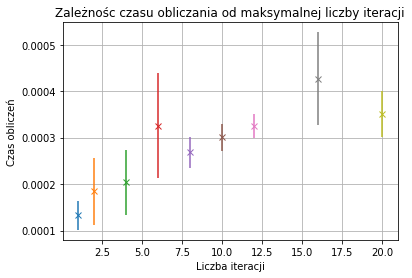

In [14]:
# Iteracyjna metoda gradientów sprzężonych

if main.is_symmetric(A3) is True:
    print('Macierz spełnia warunki dot. metody gradientów sprzężonych \n')

cg_results = []
for i in range(len(maxiter)):
    ans_x, iters = sp_linalg.cg(A3, b3, x_init, epsilon, maxiter[i])
    norm = lab6.residual_norm(A2, ans_x, b2)
    cg_results.append(norm)
    
    plt.scatter(maxiter[i], cg_results[i])
    plt.title('Zależnośc dokładności od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()

time = []
error = []
for i in range(len(maxiter)):
    method_time = %timeit -r 10 -n 10 -o sp_linalg.cg(A3, b3, x_init, epsilon, maxiter[i])
    time.append(method_time.average)
    error.append(method_time.stdev)
    plt.errorbar(maxiter[i], time[i], yerr=error[i], marker="x")
    plt.grid()
    plt.title('Zależnośc czasu obliczania od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Czas obliczeń')
plt.show()

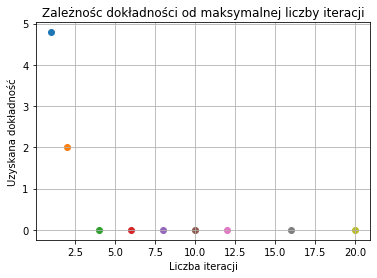

5.01 ms ± 486 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
5.88 ms ± 333 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
10.3 ms ± 1.38 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
11.8 ms ± 1.4 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)
3.38 ms ± 347 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
268 µs ± 33.5 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
281 µs ± 36.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
274 µs ± 35.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
260 µs ± 16.7 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


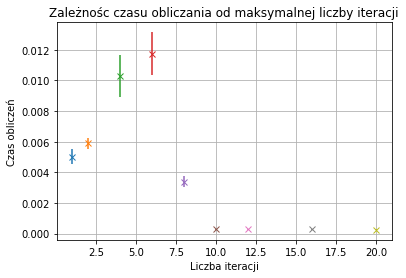

In [15]:
# Iteracyjna metoda GMRES

gmres_results = []
for i in range(len(maxiter)):
    ans_x, iters = sp_linalg.gmres(A3, b3, x_init, epsilon, maxiter[i])
    norm = lab6.residual_norm(A3, ans_x, b3)
    gmres_results.append(norm)
    
    plt.scatter(maxiter[i], gmres_results[i])
    plt.title('Zależnośc dokładności od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()

time = []
error = []
for i in range(len(maxiter)):
    method_time = %timeit -r 10 -n 10 -o sp_linalg.gmres(A3, b3, x_init, epsilon, maxiter[i])
    time.append(method_time.average)
    error.append(method_time.stdev)
    plt.errorbar(maxiter[i], time[i], yerr=error[i], marker="x")
    plt.grid()
    plt.title('Zależnośc czasu obliczania od maksymalnej liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Czas obliczeń')
plt.show()

## Wnioski

##### Funkcja solve:
Funkcję tę można było użyć do każdej macierzy, gdyż zawiera w sobie różne metody rozwiązywania zadanych problemów w zależności od "wrzuconych" do niej danych. Wartość normy dla tej metody dla wszstkich macierzy wychodzi podobna (tylko dla macierzy diagonalnie zdominowanej rozwiązanie było dokładniejsze, co jest zrozumiałe gdy mamy doczynienia z macierzą, gdzie najbardziej znaczące elementy znajdują się na przekątnej). Nie badałem złożoności czasowej tej metody, gdyż zajmowaliśmy się tym na poprzednich laboratoriach.

##### Funkcja solve_jacobi:
Tę funkcję mogliśmy zastosować tylko do macierzy diagonalnie zdominowanej (podpunkt B). Patrząc na wykres dokładności tej metody widać punkty układające się po odwróconej eksponencie wraz ze wzrostem liczby iteracji, co jest zgodne z założeniami teoretycznymi. Także wykres złożoności czasowej dostaliśmy spodziewany rezultat, gdzie możemy zauważyć wzrost podobny do liniowego. Porównując tę metodę do GMRES - wypada ona lepiej.

##### Funkcja gradientów sprzężonych
Tę funkcję mogliśmy zastosować tylko do macierzy symetryczej (podpunkt C). Z wykresu dokładności widać na pierwszy rzut oka dziwna zależność, gdzie dokładność dla małej liczby iteracji "skacze" po różnych wartościach, później stabilizuje się koło pewnej wartości. Może to wynikać ze zbyt małej liczby iteracji jak dla tej metody (powinny to być wartości rzędu stu/tysiąca powtórzeń). Przy naszych liczbach powtórzeń funkcja "dobija" do maksymalnej liczby iteracji nie znajdując rozwiązania o zadanej dokładności, a jej rozwiązanie jest bardzo niedokładne. Natomiast patrząc na złożność czasową, rośnie ona liniowo mimo niezmiennej dokładności. Na tle metody GMRES wypada lepiej czasowo.

##### Funkcja GMRES
Funkcję tę można było użyć do każdej macierzy, gdyż nie potrzebuje spełnienia żadnych specjalnych warunków dotyczących macierzy A. Dokładnośc uzyskana przez tą metodę jest zadowalająca. Powyżej pewnej liczby iteracji (10) rowiązanie jest już zbliżone do 0. Podejrzewam, że dla innej liczby iteracji przedstawionej na wykresie (wartości rzędu 100/1000/10000 byłoby bardziej widać tę zależność). Natomiast złożoność czasowa rośnie, choć powyżej pewnej wartości gwałtownie spada do 0 i nie wiem co jest tego przyczyną.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)